In [2]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import sys

# Change root directory to the repo root (Jupyter: __file__ is not defined)
def find_repo_root(start=Path.cwd()):
	for p in [start] + list(start.parents):
		if (p / 'Code').exists() or (p / '.git').exists() or (p / 'local_repo').exists():
			return p
	return start

repo_root = find_repo_root()
data_root = repo_root.parent.parent / 'Data' / 'CBOS ready'
geo_root = repo_root.parent.parent / 'Data' / 'Geospatial'

Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry'],
      dtype='object')
16 voivodeships (should be 16)


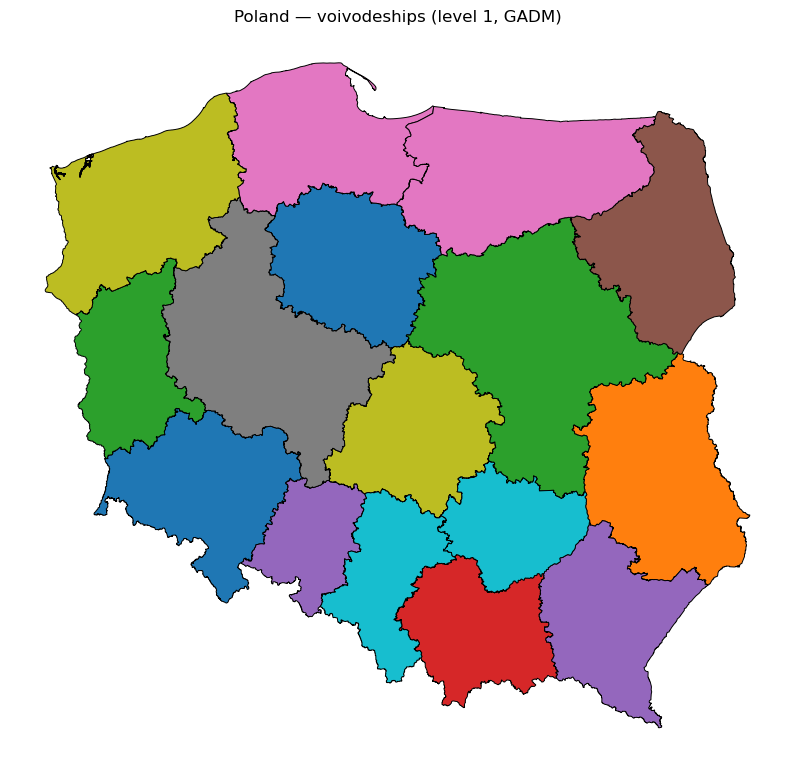

In [4]:
# Run in a Python environment with geopandas installed
# pip install geopandas requests rtree pyproj shapely

import os
import requests
import zipfile
import geopandas as gpd
import matplotlib.pyplot as plt

# 1) download GADM (example host: UC Davis geodata mirror)
url = "https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_POL_shp.zip"
zip_path = geo_root / "gadm41_POL_shp.zip"
if not os.path.exists(zip_path):
    r = requests.get(url, stream=True)
    r.raise_for_status()
    with open(zip_path, "wb") as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)

# 2) unzip (optional) and read level-1 shapefile
with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(geo_root / "gadm41_POL_shp")

# shapefile for admin level 1 inside the zip is typically named like: gadm41_POL_1.shp
gdf = gpd.read_file(geo_root / "gadm41_POL_shp/gadm41_POL_1.shp")  # level 1 = voivodeships

# quick inspect
print(gdf.columns)
print(len(gdf), "voivodeships (should be 16)")

# 3) plot
ax = gdf.plot(edgecolor="black", linewidth=0.7, figsize=(10,10), column="NAME_1", legend=False)
ax.set_title("Poland — voivodeships (level 1, GADM)")
ax.axis("off")
plt.show()
